In [1]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


    extract-msg (<=0.29.*)
                 ~~~~~~~^

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from IPython.display import Markdown, display
from openai import OpenAI
import openai
import os

openai.api_key = "your_API_key"
client = OpenAI(api_key=openai.api_key)

response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "system", "content": "You are a great philosopher."},
    {"role": "user", "content": "What is the meaning of life?"}
  ]
)
display(Markdown(response.choices[0].message.content))

The question of the meaning of life has been a central theme in philosophy, religion, and literature for centuries, and it does not have a singular answer. Different perspectives offer varied interpretations:

1. **Philosophical Perspectives**: Existentialist philosophers like Jean-Paul Sartre and Albert Camus suggest that life has no inherent meaning, and it is up to individuals to create their own purpose and values. In contrast, utilitarian thinkers like John Stuart Mill argue that meaning can be found in actions that promote the greatest happiness for the most people.

2. **Religious Viewpoints**: Many spiritual traditions propose that the meaning of life is tied to a connection with the divine or the pursuit of spiritual enlightenment. For example, in Christianity, the purpose of life may be to love and serve God and others.

3. **Scientific and Secular Approaches**: Some argue that from a biological standpoint, the purpose of life is to survive and reproduce. Others might focus on personal fulfillment, pursuing knowledge, love, creativity, or contributing to the well-being of others.

4. **Personal Meaning**: Many contemporary thinkers posit that meaning is subjective and can vary greatly from one person to another. What brings joy and purpose to one individual may differ significantly for another.

Ultimately, the meaning of life can be seen as a deeply personal journey, shaped by individual experiences, reflections, and choices. Each person may need to explore and discover what brings them fulfillment, connection, and happiness in their own life.

In [47]:
import pandas as pd
import json

# Load the datasets (replace with the correct paths if needed)
train_data = pd.read_csv('3_balanced_trainv2.csv')
val_data = pd.read_csv('3_balanced_valv2.csv')
test_data = pd.read_csv('3_balanced_testv2.csv')
ssc_test_data = pd.read_csv('3_ssc_testv2.csv')

# Function to clean up the data and format it for GPT fine-tuning
def clean_and_convert_to_jsonl(data, output_file_path):
    # Ensure the 'label' is numeric and strip any possible whitespaces
    data['label'] = pd.to_numeric(data['label'], errors='coerce')
    
    # Create JSONL format data
    jsonl_data = []
    for index, row in data.iterrows():
        jsonl_data.append({
            "messages": [
                {"role": "system", "content": "Given a sentence, classify the level of causality as '1', '2', or '3'."},
                {"role": "user", "content": row['sentence']},
                {"role": "assistant", "content": f"\"{row['label']}\""}
            ]
        })
    
    # Save to JSONL file
    with open(output_file_path, 'w') as f:
        for item in jsonl_data:
            f.write(json.dumps(item) + '\n')

    print(f"Data saved to {output_file_path}")
    return jsonl_data  # Optional: return the data for further processing if needed


# Convert the train, validation, and test datasets to JSONL
train_output_file_path = 'causality_classification_train.jsonl'
validation_output_file_path = 'causality_classification_validation.jsonl'
test_output_file_path = 'causality_classification_test.jsonl'
ssc_test_output_file_path = 'causality_classification_ssc_test.jsonl'

train_jsonl = clean_and_convert_to_jsonl(train_data, train_output_file_path)
validation_jsonl = clean_and_convert_to_jsonl(val_data, validation_output_file_path)
test_jsonl = clean_and_convert_to_jsonl(test_data, test_output_file_path)
ssc_test_jsonl = clean_and_convert_to_jsonl(ssc_test_data, ssc_test_output_file_path)


Data saved to causality_classification_train.jsonl
Data saved to causality_classification_validation.jsonl
Data saved to causality_classification_test.jsonl
Data saved to causality_classification_ssc_test.jsonl


In [11]:

# Print the first 10 sentences from the training dataset
for i, item in enumerate(train_jsonl[:10]):
    print(f"Sentence {i + 1}: {item['messages'][1]['content']}, Label: {item['messages'][2]['content']}")

Sentence 1: We also find that the level of contribution under different default options is sensitive to the type of the public goods game employed., Label: "2"
Sentence 2: If all participants adopt the strategy of never using the bus then they will each receive an earning of £25., Label: "2"
Sentence 3: Our results show that social ties between group members influence both cooperation and norm enforcement -creating substantial differences between M G and SG., Label: "1"
Sentence 4: Attributing human character- istics and motivations to nonhuman agents increases the ability to make sense of an agent's action and reduces uncertainty., Label: "3"
Sentence 5: I felt proud of myself, because thanks to me my two friends talked, and solved their problem., Label: "3"
Sentence 6: These simulation results thus lend support to our claim that the strength of ties between actors can contribute to the evolution of cooperation in dynamic networks., Label: "2"
Sentence 7: Result 3. The threat of inter

In [21]:
# Calculate the counts and percentages of each label in the training set
train_label_counts = train_data['label'].value_counts()
train_label_percentages = train_data['label'].value_counts(normalize=True) * 100

# Calculate the counts and percentages of each label in the validation set
validation_label_counts = val_data['label'].value_counts()
validation_label_percentages = val_data['label'].value_counts(normalize=True) * 100

# Calculate the counts and percentages of each label in the validation set
test_label_counts = test_data['label'].value_counts()
test_label_percentages = test_data['label'].value_counts(normalize=True) * 100

# Create a DataFrame that combines both counts and percentages
label_distribution_df = pd.DataFrame({
    "Training Set (Count)": train_label_counts,
    "Training Set (%)": train_label_percentages,
    "Validation Set (Count)": validation_label_counts,
    "Validation Set (%)": validation_label_percentages,
    "Test Set (Count)": test_label_counts,
    "Test Set (%)": test_label_percentages
}).fillna(0)  # Fill NaNs with 0 in case some labels are missing from validation

# Round the percentages to two decimal places
label_distribution_df = label_distribution_df.round(2)

# Print the DataFrame
print(label_distribution_df)


       Training Set (Count)  Training Set (%)  Validation Set (Count)  \
label                                                                   
1                       465             33.33                      67   
2                       465             33.33                      67   
3                       465             33.33                      67   

       Validation Set (%)  Test Set (Count)  Test Set (%)  
label                                                      
1                   33.33               133         33.33  
2                   33.33               133         33.33  
3                   33.33               133         33.33  


Average sentence length (in words): 23.40


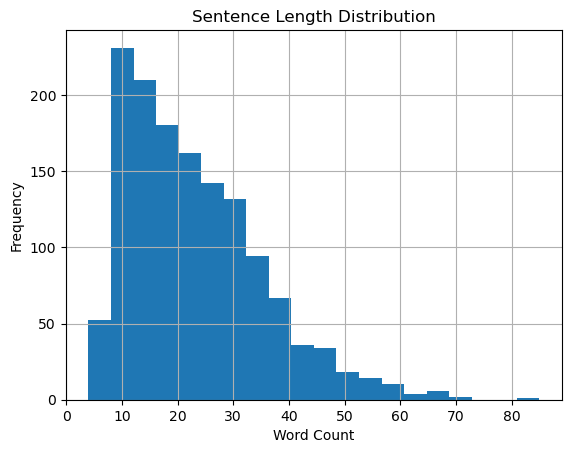

In [22]:
import matplotlib.pyplot as plt
train_data['sentence_length'] = train_data['sentence'].apply(lambda x: len(x.split()))
average_length = train_data['sentence_length'].mean()
print(f"Average sentence length (in words): {average_length:.2f}")


train_data['sentence_length'].hist(bins=20)
plt.title('Sentence Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [23]:
from openai import OpenAI
import openai
openai.api_key = "your_API_key"
client = OpenAI(api_key=openai.api_key)

In [24]:
train_file = client.files.create(
  file=open(train_output_file_path, "rb"),
  purpose="fine-tune"
)

valid_file = client.files.create(
  file=open(validation_output_file_path, "rb"),
  purpose="fine-tune"
)

print(f"Training file Info: {train_file}")
print(f"Validation file Info: {valid_file}")

Training file Info: FileObject(id='file-KwRcWSYPww93H8VH2gHPKz', bytes=490983, created_at=1736938591, filename='causality_classification_train.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)
Validation file Info: FileObject(id='file-UVjsm6V41dXHCpLQa4RMAQ', bytes=71636, created_at=1736938592, filename='causality_classification_validation.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)


In [25]:
model = client.fine_tuning.jobs.create(
  training_file=train_file.id, 
  validation_file=valid_file.id,
  model="gpt-4o-mini-2024-07-18", 
  hyperparameters={
    "n_epochs": 1,
    "batch_size": 3,
    "learning_rate_multiplier": 0.3
  }
)
job_id = model.id
status = model.status

print(f'Fine-tuning model with jobID: {job_id}.')
print(f"Training Response: {model}")
print(f"Training Status: {status}")

Fine-tuning model with jobID: ftjob-ynHQ81p4p9jNxmeRVurnzy9h.
Training Response: FineTuningJob(id='ftjob-ynHQ81p4p9jNxmeRVurnzy9h', created_at=1736938609, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=1, batch_size=3, learning_rate_multiplier=0.3), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-2ZKv8wmk8FOFjhNffETHIztK', result_files=[], seed=2109288375, status='validating_files', trained_tokens=None, training_file='file-KwRcWSYPww93H8VH2gHPKz', validation_file='file-UVjsm6V41dXHCpLQa4RMAQ', estimated_finish=None, integrations=[], user_provided_suffix=None, method={'type': 'supervised', 'supervised': {'hyperparameters': {'batch_size': 3, 'learning_rate_multiplier': 0.3, 'n_epochs': 1}}})
Training Status: validating_files


In [26]:
# Retrieve the state of a fine-tune
client.fine_tuning.jobs.retrieve(job_id)

FineTuningJob(id='ftjob-ynHQ81p4p9jNxmeRVurnzy9h', created_at=1736938609, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=1, batch_size=3, learning_rate_multiplier=0.3), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-2ZKv8wmk8FOFjhNffETHIztK', result_files=[], seed=2109288375, status='validating_files', trained_tokens=None, training_file='file-KwRcWSYPww93H8VH2gHPKz', validation_file='file-UVjsm6V41dXHCpLQa4RMAQ', estimated_finish=None, integrations=[], user_provided_suffix=None, method={'type': 'supervised', 'supervised': {'hyperparameters': {'n_epochs': 1, 'batch_size': 3, 'learning_rate_multiplier': 0.3}}})

In [27]:
# Cancel a job
#client.fine_tuning.jobs.cancel(job_id)

In [39]:
result = client.fine_tuning.jobs.list()

# Retrieve the fine tuned model
fine_tuned_model = result.data[0].fine_tuned_model
print(fine_tuned_model)

ft:gpt-4o-mini-2024-07-18:eindhoven-university-of-technology::ApveHG25


In [40]:
completion = client.chat.completions.create(
  model = fine_tuned_model,
  messages=[
    {
      "role": "system",
        "content": "Given a sentence, classify the level of causality as '1', '2', or '3'." },
    {
      "role": "user",
      "content": "Preterm and early term birth are strong risk factors for the development of CKD from childhood into mid-adulthood."
    }
  ]
)
print(completion.choices[0].message.content)

"3"


In [36]:
fine_tuned_model = "ft:gpt-4o-mini-2024-07-18:eindhoven-university-of-technology::ApveHG25"

In [37]:
# Delete a fine-tuned model (must be an owner of the org the model was created in)
#client.models.delete(fine_tuned_model)


In [41]:
def predict(test, model):
    y_pred = []
    categories = ["1", "2", "3"]

    for index, row in test.iterrows():
        response = client.chat.completions.create(
            model=fine_tuned_model,
            messages=[
                {
                    
                    "role": "system",

                    "content": "Given a sentence, classify the level of causality as '1', '2', or '3'."
                },
                {"role": "user", "content": row["sentence"]},
            ],
        )

        answer = response.choices[0].message.content

        # Determine the predicted category
        for category in categories:
            if category.lower() in answer.lower():
                y_pred.append(category)
                break
        else:
            y_pred.append("none")  # In case none of the expected categories are found in the answer

    return y_pred


In [103]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(y_true, y_pred, data):
    # Ensure that y_pred is the same type as y_true
    y_pred = [int(pred) for pred in y_pred]  # Convert y_pred to integers
    
    # Define the labels and create a mapping from label to index
    labels = [1, 2, 3]  # Use integers for consistency
    mapping = {label: idx for idx, label in enumerate(labels)}

    # Map y_true and y_pred to their corresponding indices
    y_true_mapped = np.vectorize(mapping.get)(y_true)
    y_pred_mapped = np.vectorize(mapping.get)(y_pred)

    # Calculate overall accuracy
    accuracy = accuracy_score(y_true=y_true_mapped, y_pred=y_pred_mapped)
    print(f"Overall Accuracy: {accuracy:.3f}")

    # Misclassified examples
    misclassified_indices = [i for i in range(len(y_true_mapped)) if y_true_mapped[i] != y_pred_mapped[i]]
    misclassified_data = data.iloc[misclassified_indices].copy()
    misclassified_data['True Label'] = y_true.iloc[misclassified_indices]
    misclassified_data['Predicted Label'] = [labels[pred] for pred in y_pred_mapped[misclassified_indices]]

    # Include the source column (assuming 'source' is a column in the data)
    misclassified_data['Source'] = data['source'].iloc[misclassified_indices].values

    # Drop the redundant columns 'label' and the extra 'Source' column
    misclassified_data = misclassified_data.drop(columns=['label'])
    misclassified_data = misclassified_data.drop(columns=['source'])

    # Save the misclassified sentences to a CSV file
    misclassified_data.to_csv('3_misclassified_sentences_GPT_ssc.csv', index=False)
    print(f"Misclassified sentences saved to '3_misclassified_sentences_GPT_ssc.csv'.")

    # Plot confusion matrix
    conf_matrix = confusion_matrix(
        y_true=y_true_mapped,
        y_pred=y_pred_mapped,
        labels=[0, 1, 2]  # Specify the indices for the labels
    )

    # Update the labels for the confusion matrix
    label_names = {1: "Correlational", 2: "Conditional Causal", 3: "Direct Causal"}

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[label_names[i] for i in labels], yticklabels=[label_names[i] for i in labels])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Generate the classification report
    class_report = classification_report(
        y_true=y_true_mapped,
        y_pred=y_pred_mapped,
        target_names=[str(label_names[label]) for label in labels],  # Use the updated names for the report
        labels=[0, 1, 2]  # Ensure labels are correctly passed
    )

    print("\nClassification Report:")
    print(class_report)


Overall Accuracy: 0.584
Misclassified sentences saved to '3_misclassified_sentences_GPT.csv'.


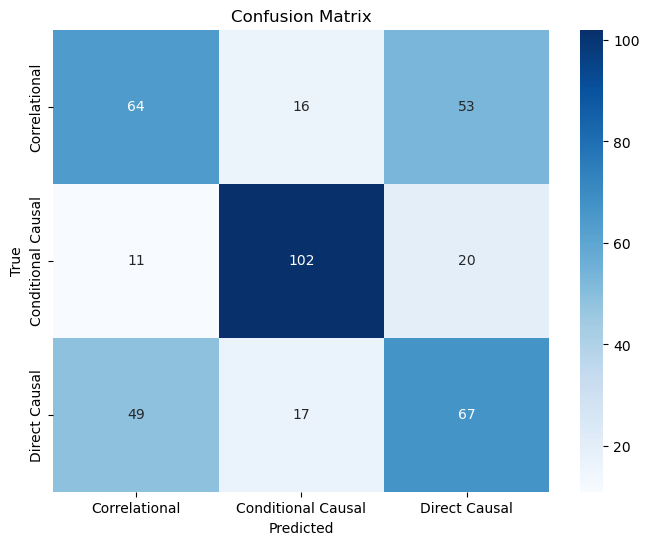


Classification Report:
                    precision    recall  f1-score   support

     Correlational       0.52      0.48      0.50       133
Conditional Causal       0.76      0.77      0.76       133
     Direct Causal       0.48      0.50      0.49       133

          accuracy                           0.58       399
         macro avg       0.58      0.58      0.58       399
      weighted avg       0.58      0.58      0.58       399



In [96]:
y_pred = predict(test_data, "ft:gpt-4o-mini-2024-07-18:eindhoven-university-of-technology::ApveHG25")
y_true = test_data["label"]

# Call evaluate function
evaluate(y_true, y_pred, test_data)

In [97]:
misclassifications = pd.read_csv('3_misclassified_sentences_GPT.csv')
misclassifications

,sentence,True Label,Predicted Label,Source
0,The gains or losses incurred by the players on each trial are dependent on choices made by both of them between two available behaviors.,3,1,ssc
1,"Both the Outcome for Others and the Equality of Outcomes depend on others, meaning when the total group is greater than two people, these others' properties are combinations of multiple people's behaviors, not just a single individual's behavior.",1,2,ssc
2,"Otherwise, if the accumulated gain explains the behaviour of the birds but the one trial gain does not, then the birds are making decisions based on the four trial reward and are playing a mutualism game.",2,3,ssc
3,The amount of communication allowed in a game thus appears to be a decisive factor in clarifying and specifying the contradictory evidence on sex differences in cooperation.,2,3,ssc
4,"Large coalitions mean few outsiders but, at the same time, high free-rider benefits if the coalition members fully internalize their mutual benefits.",3,1,ssc
...,...,...,...,...
161,"In this 2-year prospective study in a hospital-based cohort of high-risk hemodialysis patients, elevated CRP, but not raised PCT, was associated with increased mortality.",3,1,pubmed
162,"Based on the comparatively smaller observed differences associated with menopausal status than with chronological aging, the significance of a more unfavorable lipid profile in a later reproductive stage may be less obvious than previously thought.",3,2,pubmed
163,"When FEA is found in association with LN at biopsy, surgical excision yields more frequently ADH than pure FEA thus warranting close surveillance or even surgical excision.",3,1,pubmed
164,This has resulted in many more veterans returning with genitourinary (GU) injuries.,3,1,press_release


In [101]:
misclassifications.groupby('Source').count()

,sentence,True Label,Predicted Label
Source,,,
press_release,50,50,50
pubmed,69,69,69
ssc,47,47,47


Overall Accuracy: 0.561
Misclassified sentences saved to '3_misclassified_sentences_GPT_ssc.csv'.


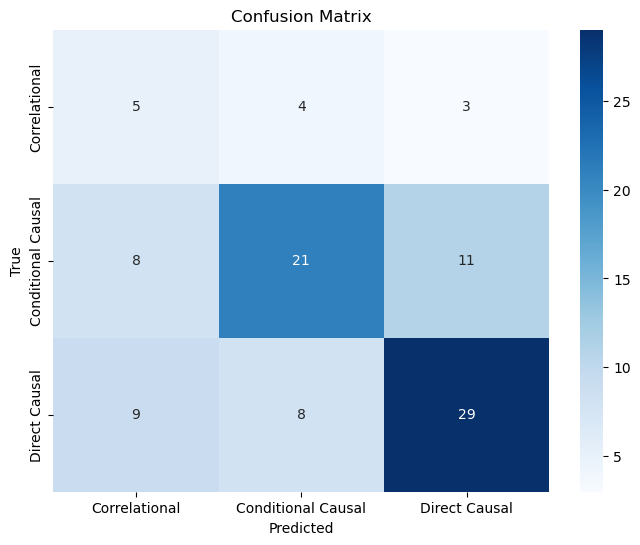


Classification Report:
                    precision    recall  f1-score   support

     Correlational       0.23      0.42      0.29        12
Conditional Causal       0.64      0.53      0.58        40
     Direct Causal       0.67      0.63      0.65        46

          accuracy                           0.56        98
         macro avg       0.51      0.52      0.51        98
      weighted avg       0.60      0.56      0.58        98



In [104]:
y_pred = predict(ssc_test_data, "ft:gpt-4o-mini-2024-07-18:eindhoven-university-of-technology::ApveHG25")
y_true = ssc_test_data["label"]

# Call evaluate function
evaluate(y_true, y_pred, ssc_test_data)

In [105]:
misclassifications_ssc = pd.read_csv('3_misclassified_sentences_GPT_ssc.csv')
misclassifications_ssc

,sentence,True Label,Predicted Label,Source
0,The gains or losses incurred by the players on each trial are dependent on choices made by both of them between two available behaviors.,3,1,ssc
1,"Both the Outcome for Others and the Equality of Outcomes depend on others, meaning when the total group is greater than two people, these others' properties are combinations of multiple people's behaviors, not just a single individual's behavior.",1,2,ssc
2,"Thus, because an elected leader refl ects the choice of the group and its members, an elected leader will feel strong support from the followers who will bestow on the leader a high sense of social responsibility ( Julian, Hollander, & Regula, 1969;Kenney et al., 1996).",3,1,ssc
3,The amount of communication allowed in a game thus appears to be a decisive factor in clarifying and specifying the contradictory evidence on sex differences in cooperation.,2,3,ssc
4,But since the payoff for mutual defection is smaller than the payoff for mutual cooperation (fwo) the dilemma arises on what to choose if having in mind also the welfare of the society and not just personal interests.,2,1,ssc
5,"When everyone has made a choice, the outcome and the choices of the other members of your committee are revealed, and this determines your earnings for the match.",3,1,ssc
6,"Fear is associated with the goal to avoid risk, which in a social dilemma induces a tendency to avoid exploitation or loss.",2,3,ssc
7,"Interacting with others in large populations without structure greatly reduces the likelihood of cooperation (11), but in a fixed social network cooperation can evolve as a consequence of repeated interactions because of ""social viscosity,"" even in the absence of reputation effects or strategic complexity (1,2).",3,2,ssc
8,"But you should also be careful not to ask for too much, because if at the end of the study everyone's requests add up to more than the $1,000 that is in the pool, then nobody, including yourself, will receive anything.",2,3,ssc
9,"The maintenance of social norms often depends on external enforcement, as in the absence of credible sanctioning mechanisms prosocial behaviour deteriorates quickly.",3,2,ssc
